<a href="https://colab.research.google.com/github/yasanmaduranga/Final_Year_Project/blob/main/FYP_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [91]:
df = pd.read_csv('/content/gdrive/MyDrive/time series data set/topic08_weekly.csv')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Row Labels       113 non-null    object
 1   Num of articles  113 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [93]:
df.head()

,Row Labels,Num of articles
0,1/2/2020 - 1/8/2020,8
1,1/9/2020 - 1/15/2020,19
2,1/16/2020 - 1/22/2020,5
3,1/23/2020 - 1/29/2020,9
4,1/30/2020 - 2/5/2020,5


In [94]:
df.tail()

,Row Labels,Num of articles
108,1/27/2022 - 2/2/2022,12
109,2/3/2022 - 2/9/2022,20
110,2/10/2022 - 2/16/2022,10
111,2/17/2022 - 2/23/2022,13
112,2/24/2022 - 3/1/2022,8


In [95]:
df1=df.reset_index()['Num of articles']

In [97]:
df1

0       8
1      19
2       5
3       9
4       5
       ..
108    12
109    20
110    10
111    13
112     8
Name: Num of articles, Length: 113, dtype: int64

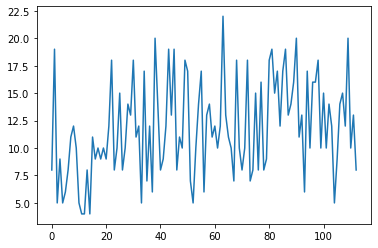

In [98]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [99]:
import numpy as np

In [100]:
df1

0       8
1      19
2       5
3       9
4       5
       ..
108    12
109    20
110    10
111    13
112     8
Name: Num of articles, Length: 113, dtype: int64

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [102]:
print(df1)

[[0.22222222]
 [0.83333333]
 [0.05555556]
 [0.27777778]
 [0.05555556]
 [0.11111111]
 [0.22222222]
 [0.38888889]
 [0.44444444]
 [0.33333333]
 [0.05555556]
 [0.        ]
 [0.        ]
 [0.22222222]
 [0.        ]
 [0.38888889]
 [0.27777778]
 [0.33333333]
 [0.27777778]
 [0.33333333]
 [0.27777778]
 [0.44444444]
 [0.77777778]
 [0.22222222]
 [0.33333333]
 [0.61111111]
 [0.22222222]
 [0.33333333]
 [0.55555556]
 [0.5       ]
 [0.77777778]
 [0.38888889]
 [0.44444444]
 [0.05555556]
 [0.72222222]
 [0.16666667]
 [0.44444444]
 [0.11111111]
 [0.88888889]
 [0.55555556]
 [0.22222222]
 [0.27777778]
 [0.44444444]
 [0.83333333]
 [0.5       ]
 [0.83333333]
 [0.22222222]
 [0.38888889]
 [0.33333333]
 [0.77777778]
 [0.72222222]
 [0.16666667]
 [0.05555556]
 [0.33333333]
 [0.55555556]
 [0.72222222]
 [0.11111111]
 [0.5       ]
 [0.55555556]
 [0.38888889]
 [0.44444444]
 [0.33333333]
 [0.44444444]
 [1.        ]
 [0.5       ]
 [0.38888889]
 [0.33333333]
 [0.16666667]
 [0.77777778]
 [0.33333333]
 [0.22222222]
 [0.33

In [103]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [104]:
training_size,test_size

(96, 17)

In [105]:
train_data

array([[0.22222222],
       [0.83333333],
       [0.05555556],
       [0.27777778],
       [0.05555556],
       [0.11111111],
       [0.22222222],
       [0.38888889],
       [0.44444444],
       [0.33333333],
       [0.05555556],
       [0.        ],
       [0.        ],
       [0.22222222],
       [0.        ],
       [0.38888889],
       [0.27777778],
       [0.33333333],
       [0.27777778],
       [0.33333333],
       [0.27777778],
       [0.44444444],
       [0.77777778],
       [0.22222222],
       [0.33333333],
       [0.61111111],
       [0.22222222],
       [0.33333333],
       [0.55555556],
       [0.5       ],
       [0.77777778],
       [0.38888889],
       [0.44444444],
       [0.05555556],
       [0.72222222],
       [0.16666667],
       [0.44444444],
       [0.11111111],
       [0.88888889],
       [0.55555556],
       [0.22222222],
       [0.27777778],
       [0.44444444],
       [0.83333333],
       [0.5       ],
       [0.83333333],
       [0.22222222],
       [0.388

In [106]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [107]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [108]:
print(X_train.shape), print(y_train.shape)

(90, 5)
(90,)


(None, None)

In [109]:
print(X_test.shape), print(ytest.shape)

(11, 5)
(11,)


(None, None)

In [110]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [111]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [112]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_7 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_7 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 7s 1s/step - loss: 0.2475 - val_loss: 0.2256
Epoch 2/100
2/2 [==============================] - 0s 35ms/step - loss: 0.2202 - val_loss: 0.1977
Epoch 3/100
2/2 [==============================] - 0s 37ms/step - loss: 0.1939 - val_loss: 0.1688
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.1666 - val_loss: 0.1381
Epoch 5/100
2/2 [==============================] - 0s 38ms/step - loss: 0.1367 - val_loss: 0.1063
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 0.1057 - val_loss: 0.0761
Epoch 7/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0757 - val_loss: 0.0542
Epoch 8/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0549 - val_loss: 0.0531
Epoch 9/100
2/2 [==============================] - 0s 58ms/step - loss: 0.0565 - val_loss: 0.0746
Epoch 10/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0724 - val_loss: 0.0804
Epoch 11/100
2/2 [===

In [116]:
import tensorflow as tf

In [117]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [118]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [119]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11.063522389476269

In [120]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

11.464574569695582

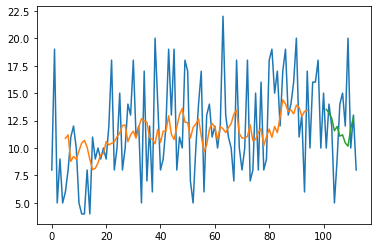

In [121]:
### Plotting 
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [122]:
len(test_data)

17

In [123]:
x_input=test_data[12:].reshape(1,-1)
x_input.shape

(1, 5)

In [124]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [125]:
temp_input

[0.4444444444444444,
 0.888888888888889,
 0.33333333333333337,
 0.5,
 0.2222222222222222]

In [126]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<4):
    
    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} week input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} week output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.47598073]
6
1 week input [0.88888889 0.33333333 0.5        0.22222222 0.47598073]
1 week output [[0.48854077]]
2 week input [0.33333333 0.5        0.22222222 0.47598073 0.48854077]
2 week output [[0.38996896]]
3 week input [0.5        0.22222222 0.47598073 0.48854077 0.38996896]
3 week output [[0.40534988]]
[[0.4759807288646698], [0.48854076862335205], [0.38996896147727966], [0.40534988045692444]]


In [127]:
day_new=np.arange(1,6)
day_pred=np.arange(6,10)

In [128]:
import matplotlib.pyplot as plt

In [129]:
len(df1)

113

In [130]:
df3 = df1.tolist()
df3.extend(lst_output)

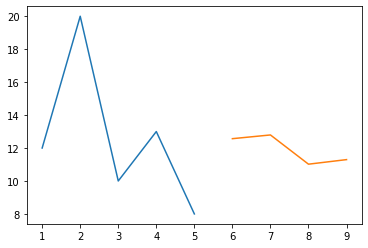

In [131]:
plt.plot(day_new,scaler.inverse_transform(df1[108:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [132]:
print(day_pred,scaler.inverse_transform(lst_output));

[6 7 8 9] [[12.56765312]
 [12.79373384]
 [11.01944131]
 [11.29629785]]


In [ ]:
#3/2/2022 - 3/8/2022   -> 11.17471009
#3/9/2022 - 3/15/2022  -> 12.03090179
#3/16/2022 - 3/22/2022 -> 11.83499753
#3/23/2022 - 3/29/2022 -> 11.50543559
